In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from category_encoders import OneHotEncoder

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer


# Prepare Data

## Import

In [3]:
df = pd.read_csv(r'C:\Users\dell\Desktop\ConsoleApplication1\projects\data\California_Housing_Prices.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


population: Total number of people residing within a block

households: Total number of people residing within a home unit

Median house value for households within a block

Median income for households within a block of houses 

## Explore

In [4]:
df.shape

(20640, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.dropna(inplace=True)

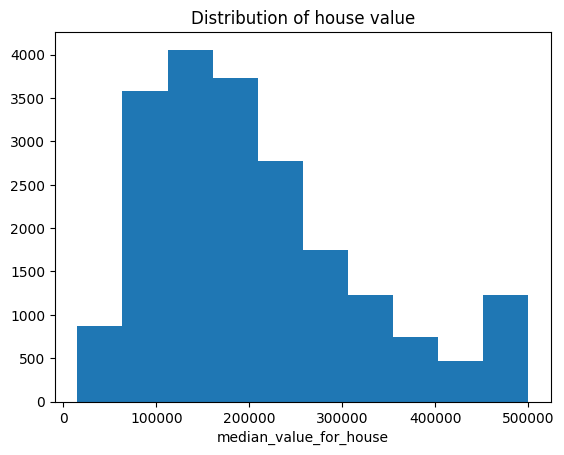

In [7]:
plt.hist(df['median_house_value'])
plt.xlabel('median_value_for_house')
plt.title("Distribution of house value");

we can see a right skewed 

the most values falls into 10000 and 250000

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df['median_income']= 100000*df['median_income']

In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,832520.0,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,830140.0,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,725740.0,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,564310.0,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,384620.0,342200.0,NEAR BAY


<Axes: xlabel='median_house_value', ylabel='median_income'>

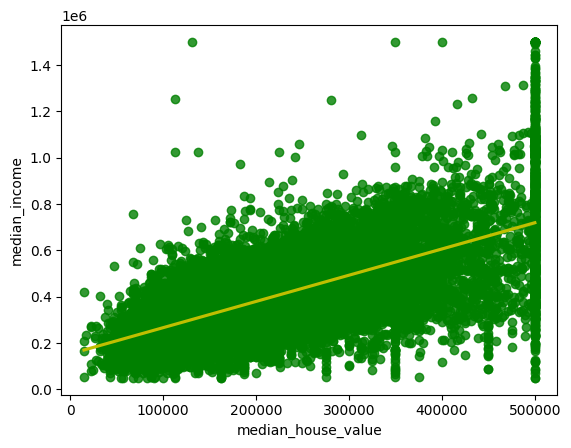

In [11]:
sns.regplot(df,x=df['median_house_value'],y=df['median_income'],line_kws={'color':'y'},scatter_kws={'color':'g'})

thier is a positive strong relation between house_value and income

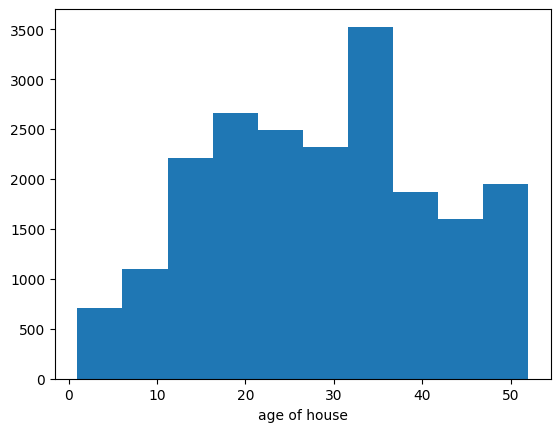

In [12]:
plt.hist(df['housing_median_age'])
plt.xlabel('age of house');

<Axes: ylabel='longitude'>

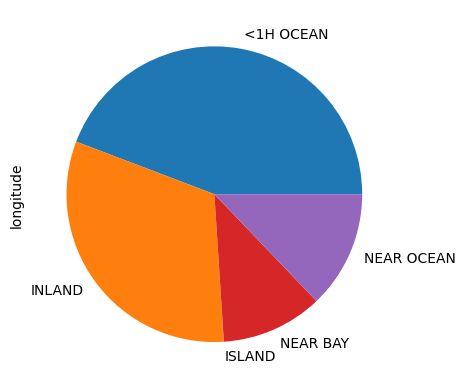

In [13]:
df.groupby('ocean_proximity').count()['longitude'].plot(kind='pie')

## Split

In [14]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [22]:
X_train = df[['housing_median_age','total_rooms','total_bedrooms']]

In [23]:
X_train.shape

(20433, 3)

In [24]:
y_train = df['median_house_value']

In [25]:
y_train.shape

(20433,)

# Build Model

In [26]:
model = make_pipeline(OneHotEncoder(use_cat_names=True),SimpleImputer(),Ridge())
model.fit(X_train,y_train);

In [27]:
check_is_fitted(model[-1])

In [29]:
y_pre_train = model.predict(X_train)
y_pre_train[:5]

array([224226.76080005, 277664.43083069, 256338.21674389, 241767.2294411 ,
       248396.6501761 ])

In [30]:
print(round(mean_absolute_error(y_train,y_pre_train),2))

86347.36


In [31]:
def make_prediction(house_age,rooms,bedrooms):
    data = {
        'housing_median_age':house_age,
        'total_rooms':rooms,
        'total_bedrooms':bedrooms
    }
    df = pd.DataFrame(data,index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted apartment price: ${prediction}"


In [34]:
make_prediction(10,6,2)

'Predicted apartment price: $156964.95'

In [36]:
interact(
    make_prediction,
    house_age=IntSlider(
        min=X_train["housing_median_age"].min(),
        max=X_train["housing_median_age"].max(),
        value=X_train["housing_median_age"].mean(),
    ),
    rooms=IntSlider(
        min=X_train["total_rooms"].min(),
        max=X_train["total_rooms"].max(),
        step=0.01,
        value=X_train["total_rooms"].mean(),
    ),
    bedrooms=IntSlider(
        min=X_train["total_bedrooms"].min(),
        max=X_train["total_bedrooms"].max(),
        step=0.01,
        value=X_train["total_bedrooms"].mean(),
    ),
);

interactive(children=(IntSlider(value=28, description='house_age', max=52, min=1), IntSlider(value=2636, descr…